## Use `Random Forest Regressor` to improve the accuracy of the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sample = pd.read_csv('playground-series-s3e21/sample_submission.csv')
train = pd.read_csv('train oxygen.csv')

In [3]:
sample.shape

(3500, 37)

In [5]:
sample.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [6]:
train.head()

,Id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,12.58,9.875,9.20,NaN,NaN,NaN,NaN,NaN,0.690,...,NaN,NaN,NaN,4.80,5.850,NaN,NaN,NaN,NaN,NaN
1,3,9.37,10.300,10.75,NaN,NaN,NaN,NaN,NaN,0.710,...,NaN,NaN,NaN,5.88,6.835,NaN,NaN,NaN,NaN,NaN
2,4,8.35,8.290,7.90,NaN,NaN,NaN,NaN,NaN,2.210,...,NaN,NaN,NaN,3.20,2.700,NaN,NaN,NaN,NaN,NaN
3,5,9.57,8.820,6.80,NaN,NaN,NaN,NaN,NaN,0.595,...,NaN,NaN,NaN,7.70,7.055,NaN,NaN,NaN,NaN,NaN
4,6,6.00,6.000,6.50,NaN,NaN,NaN,NaN,NaN,0.600,...,NaN,NaN,NaN,5.50,5.300,NaN,NaN,NaN,NaN,NaN


## Find out the distribution of the dataset

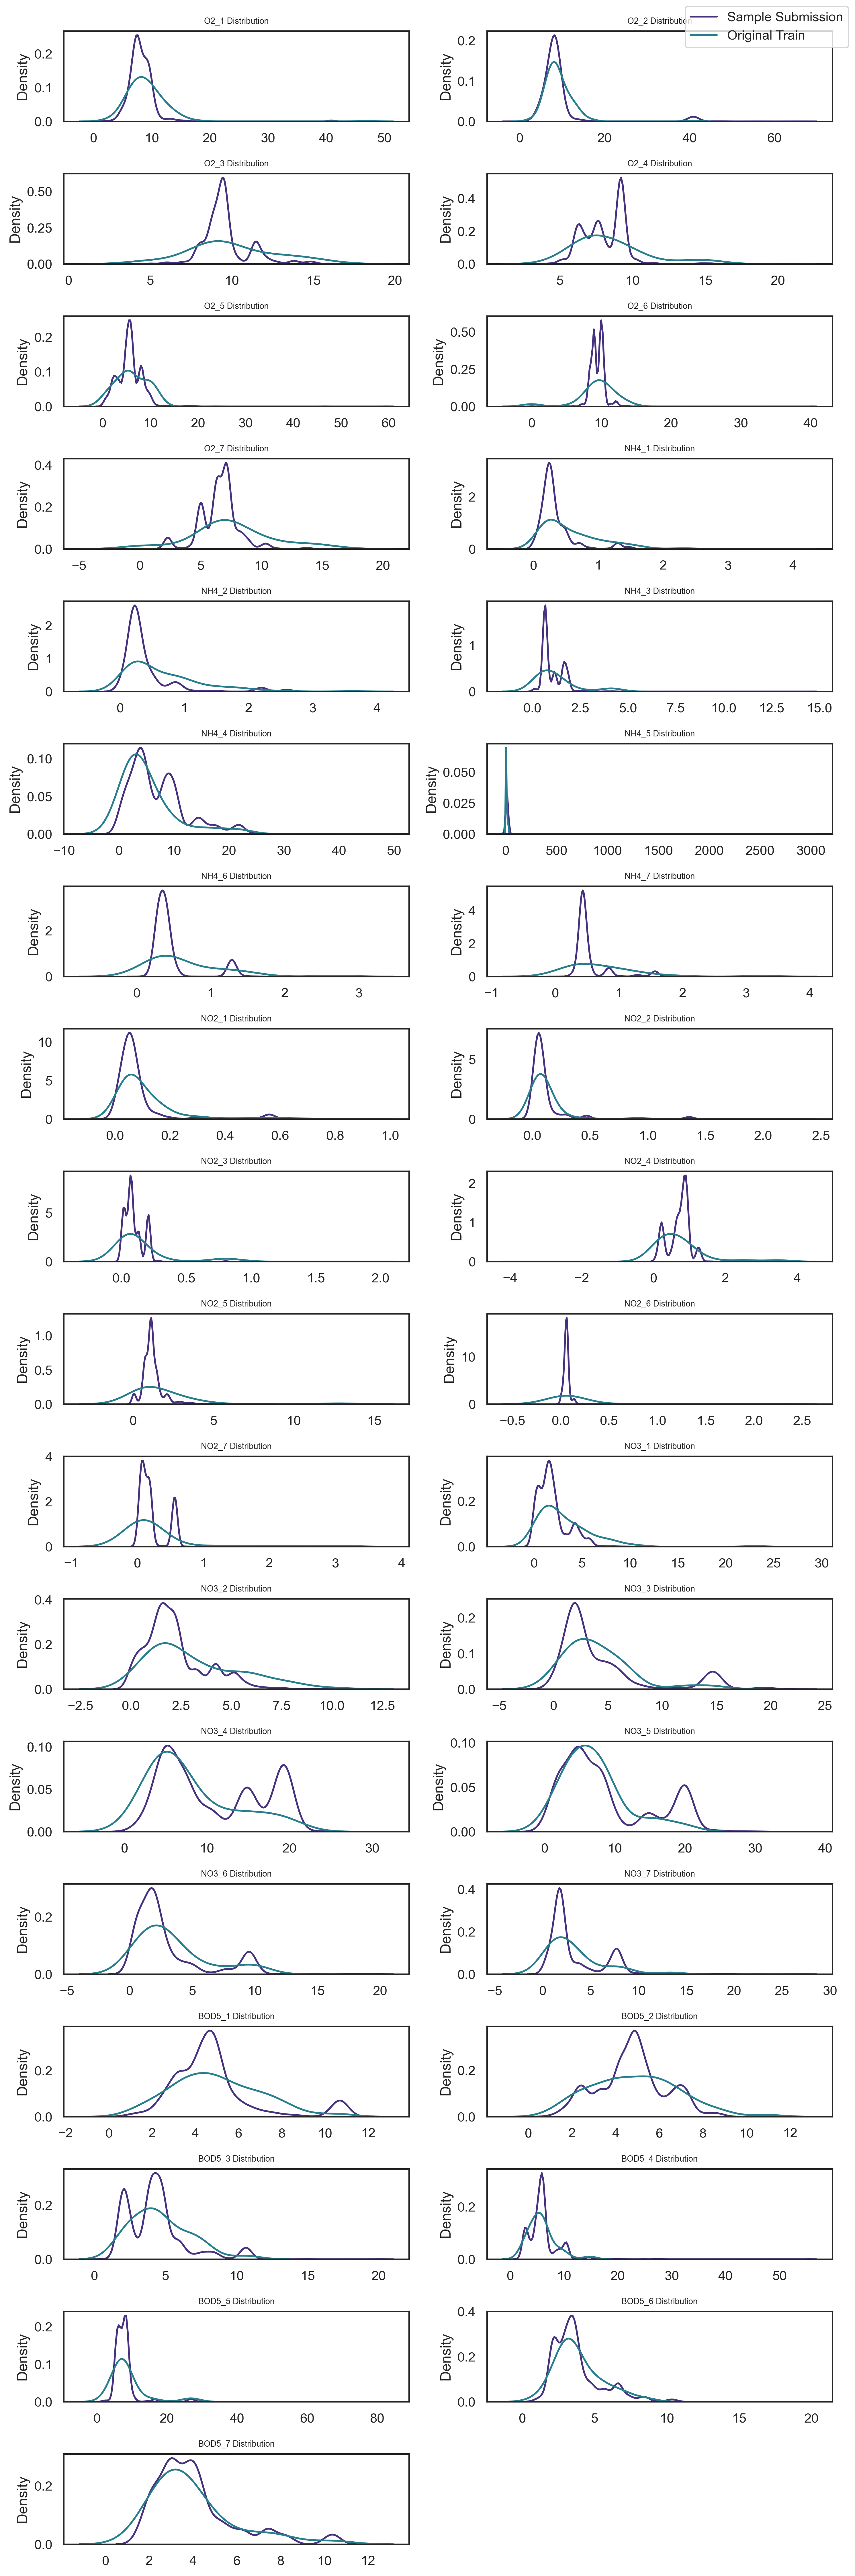

In [7]:
sns.set_theme(style='white', palette='viridis')
pal = sns.color_palette('viridis')
eda_columns = sample.columns[2:]

# Determine the number of rows and columns for subplots
num_rows = (len(eda_columns) + 1) // 2  # Calculate the number of rows
num_cols = 2  # Two plots per row

fig, ax = plt.subplots(num_rows, num_cols,figsize=(10, 30), dpi=300)
ax = ax.flatten()

for i, column in enumerate(eda_columns):
    row_idx = i // num_cols  # Calculate the row index for the subplot
    col_idx = i % num_cols   # Calculate the column index for the subplot
    
    sns.kdeplot(sample[column], ax=ax[i], color=pal[0])
    sns.kdeplot(train[column], ax=ax[i], color=pal[2])  # Make sure you use the correct dataset name
    
    ax[i].set_title(f'{column} Distribution', size=7)
    ax[i].set_xlabel(None)

# Remove any unused subplots
for i in range(len(eda_columns), num_rows * num_cols):
    fig.delaxes(ax[i])
    


fig.legend(['Sample Submission', 'Original Train'])
plt.tight_layout()
plt.show()

In [8]:
sample.isna().sum()

id        0
target    0
O2_1      0
O2_2      0
O2_3      0
O2_4      0
O2_5      0
O2_6      0
O2_7      0
NH4_1     0
NH4_2     0
NH4_3     0
NH4_4     0
NH4_5     0
NH4_6     0
NH4_7     0
NO2_1     0
NO2_2     0
NO2_3     0
NO2_4     0
NO2_5     0
NO2_6     0
NO2_7     0
NO3_1     0
NO3_2     0
NO3_3     0
NO3_4     0
NO3_5     0
NO3_6     0
NO3_7     0
BOD5_1    0
BOD5_2    0
BOD5_3    0
BOD5_4    0
BOD5_5    0
BOD5_6    0
BOD5_7    0
dtype: int64

In [9]:
train.isna().sum()

Id          0
target      0
O2_1        2
O2_2        2
O2_3      115
O2_4      116
O2_5      114
O2_6      110
O2_7      110
NH4_1       2
NH4_2       2
NH4_3     115
NH4_4     116
NH4_5     114
NH4_6     110
NH4_7     110
NO2_1       2
NO2_2       2
NO2_3     115
NO2_4     116
NO2_5     114
NO2_6     110
NO2_7     110
NO3_1       2
NO3_2       2
NO3_3     115
NO3_4     116
NO3_5     114
NO3_6     110
NO3_7     110
BOD5_1      2
BOD5_2      2
BOD5_3    115
BOD5_4    116
BOD5_5    114
BOD5_6    110
BOD5_7    110
dtype: int64

## Split the data into training and testing

In [8]:
X = sample.drop(columns = ['target','id'])
y = sample[['target']]

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## Perform MinMax Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
rf.fit(X_train_scaled, y_train_scaled)
y_hat = rf.predict(X_test)

In [12]:
y_hat

array([0.7038652 , 0.7040726 , 0.70484056, 0.70320529, 0.70501782,
       0.70616736, 0.70391298, 0.70347925, 0.70450302, 0.70346303,
       0.70376235, 0.70030725, 0.70315879, 0.70412741, 0.70421626,
       0.70397906, 0.70459524, 0.70427695, 0.7045033 , 0.70293423,
       0.70400053, 0.70420608, 0.7033332 , 0.70446941, 0.70398224,
       0.70538918, 0.70360237, 0.70400386, 0.70446938, 0.70430573,
       0.70403693, 0.70402707, 0.70532812, 0.70430925, 0.70468161,
       0.70092959, 0.70014377, 0.70434786, 0.70467007, 0.70365912,
       0.70293408, 0.70403693, 0.70397974, 0.70512356, 0.70386335,
       0.70416243, 0.70459948, 0.70417186, 0.70390234, 0.70439356,
       0.70347566, 0.70367358, 0.70029239, 0.70441324, 0.70313081,
       0.70318971, 0.70466158, 0.70472882, 0.70465326, 0.69960738,
       0.7043473 , 0.7044618 , 0.70414719, 0.70355447, 0.70436701,
       0.70375532, 0.70532741, 0.70389468, 0.70468173, 0.70474009,
       0.70432021, 0.70462387, 0.70444183, 0.70421595, 0.70474

# Perform GridSearch CV

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()


params = {"n_estimators": [10,30,50,100],
          "max_depth": [60,80,90,100],
          "min_samples_split": [4,6,8,10],
          "min_samples_leaf": [3,4,5,6]
          }

# Instantiate the grid search model
grid = GridSearchCV(estimator = rf, param_grid = params, 
                          cv = 5, n_jobs = -1, verbose = 2)

## Find the best parameters

In [14]:
grid.fit(X_train_scaled,y_train_scaled)
grid.best_params_

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


{'max_depth': 60,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 50}

In [15]:
grid.best_estimator_

RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=50)

In [16]:
grid_prediction = grid.predict(X_test)

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 60, min_samples_leaf=4, min_samples_split=6,n_estimators=10)
    
rf.fit(X_train_scaled,y_train_scaled)
y_pred = rf.predict(X_test_scaled)

In [18]:
y_pred[:5]

array([0.10481369, 0.0852923 , 0.10163393, 0.11453404, 0.06007419])

In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_scaled , y_hat)
print('Mean squared error is', mse)
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_hat))
print('Root Mean squared error is', rmse)

Mean squared error is 0.18535973999551816
Root Mean squared error is 0.43053424950347235


Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

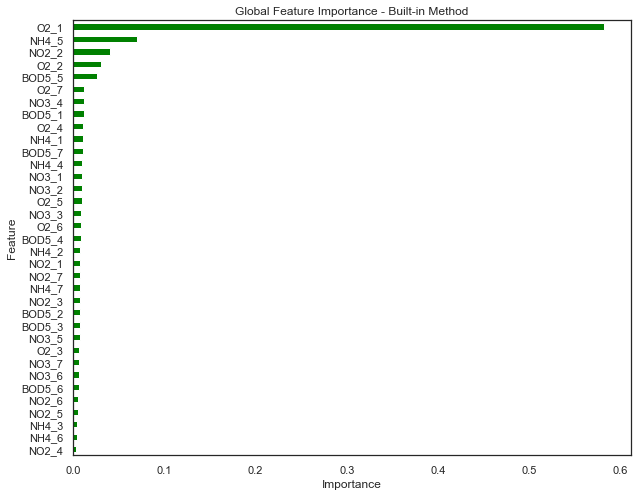

In [20]:
global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green',figsize = (10,8))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

## Model Enhancement

In [21]:
def remove_outliers(data):
    """
    Remove outliers from a dataset using the Interquartile Range (IQR) method.

    Args:
    data (list or numpy.ndarray): The input dataset.

    Returns:
    list: The dataset with outliers removed.
    """
    # Convert input to a numpy array for easier calculations
    data = np.array(data)

    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    # Calculate the IQR (Interquartile Range)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify and remove outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

    return filtered_data.tolist()

# Example usage:
data = [1, 2, 3, 4, 5, 1000]  # Replace with your dataset
filtered_data = remove_outliers(data)
print(filtered_data)

[1, 2, 3, 4, 5]


In [22]:
y_hat  = pd.DataFrame(y_hat)
y_hat

,0
0,0.703865
1,0.704073
2,0.704841
3,0.703205
4,0.705018
...,...
695,0.704815
696,0.703462
697,0.703456
698,0.704859


In [23]:
y_hat = scaler.inverse_transform(y_hat)

In [24]:
y_hat = pd.DataFrame(y_hat)

In [25]:
y_hat.shape

(700, 1)

In [29]:
y_hat

,0
0,14.570896
1,14.573949
2,14.585253
3,14.561182
4,14.587862
...,...
695,14.584882
696,14.564963
697,14.564870
698,14.585520


In [26]:
sample.shape

(3500, 37)

In [27]:
train.shape

(147, 37)

In [28]:
y_hat.shape

(700, 1)

In [29]:
df = sample.copy()

In [30]:
df.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [31]:
df.drop(columns = ['target'],inplace = True,axis = 1)

In [32]:
df = df[:700]

In [33]:
df.shape

(700, 36)

## Insert a new column in the dataset

In [34]:
import pandas as pd


# Insert a new column at a specific position (e.g., after 'Column1')
new_data = y_hat  # Replace this with your own data
df.insert(loc=1, column='target', value=new_data)


In [35]:
df.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,14.570896,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,14.573949,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,14.585253,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,14.561182,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,14.587862,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [50]:
df.to_csv('sample_submission5.csv', index=False)

In [1]:
def find_max(nums):
    
    max_num = float("-inf") # smaller than all other numbers
    for num in nums:
        if num > max_num:
            num = max_num
    return max_num